<a href="https://colab.research.google.com/github/arumajirou/-daily-test/blob/main/Stumpy_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


日本語


目標
スタンピーを用いた探索
長い時系列における異なる時系列の「部分系列」間の類似性
Data Skepticを聴いていてstumpyを見つけた
https://dataskeptic.com/blog/episodes/2022/matrix-profiles-in-stumpy
いくつかのAPIを試す
株
https://towardsdatascience.com/best-5-free-stock-market-apis-in-2019-ad91dddec984
温度
データ取得のチュートリアル https://towardsdatascience.com/obtain-historical-weather-forecast-data-in-csv-format-using-python-5a6c090fc828
基本的にこのライブラリを使う https://github.com/ekapope/WorldWeatherOnline

DeepL.comで別の訳し方を確認する



下


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install stumpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 136 kB 5.8 MB/s 


youtube       https://www.youtube.com/watch?v=akUeYkKBxpU&t=223s

In [ ]:

import yfinance as yf
import stumpy 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from  matplotlib.patches import Rectangle

In [ ]:
cat = yf.Ticker("CAT")

In [ ]:
cat.info

{'regularMarketPrice': None,
 'preMarketPrice': None,
 'logo_url': '',
 'trailingPegRatio': 1.557}

In [ ]:
x = cat.history(start = '2020-1-1', end = '2022-2-2')

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
x.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [ ]:
x.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,138.428922,139.868957,137.481284,139.850372,3311900,0.0,0
2020-01-03 00:00:00-05:00,138.215250,139.320826,136.988893,137.908661,3100600,0.0,0
2020-01-06 00:00:00-05:00,136.821655,138.020128,136.143436,137.815735,2549600,0.0,0
2020-01-07 00:00:00-05:00,136.895995,137.100388,135.186526,135.994812,2841900,0.0,0
2020-01-08 00:00:00-05:00,136.412874,138.029431,136.069129,137.202560,2153200,0.0,0


In [ ]:
x.shape

(526, 7)

In [ ]:
x['date'] = x.index

In [ ]:
print(x.shape)
x

(526, 8)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
Date,,,,,,,,
2020-01-02 00:00:00-05:00,138.428922,139.868957,137.481284,139.850372,3311900,0.0,0,2020-01-02 00:00:00-05:00
2020-01-03 00:00:00-05:00,138.215250,139.320826,136.988893,137.908661,3100600,0.0,0,2020-01-03 00:00:00-05:00
2020-01-06 00:00:00-05:00,136.821655,138.020128,136.143436,137.815735,2549600,0.0,0,2020-01-06 00:00:00-05:00
2020-01-07 00:00:00-05:00,136.895995,137.100388,135.186526,135.994812,2841900,0.0,0,2020-01-07 00:00:00-05:00
2020-01-08 00:00:00-05:00,136.412874,138.029431,136.069129,137.202560,2153200,0.0,0,2020-01-08 00:00:00-05:00
...,...,...,...,...,...,...,...,...
2022-01-26 00:00:00-05:00,211.081420,214.890708,208.371729,210.384354,3558500,0.0,0,2022-01-26 00:00:00-05:00
2022-01-27 00:00:00-05:00,211.287626,213.928586,206.319836,208.303024,3678100,0.0,0,2022-01-27 00:00:00-05:00
2022-01-28 00:00:00-05:00,201.842935,204.209014,193.213147,197.493683,10747300,0.0,0,2022-01-28 00:00:00-05:00


KeyError: ignored

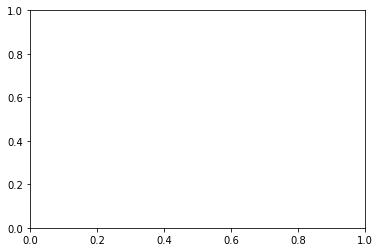

In [ ]:
x.plot.scatter(x =  x.index, y = 'Open')

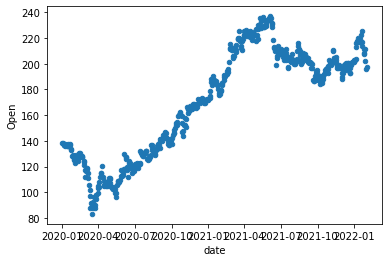

In [ ]:
x.plot.scatter(x = 'date', y = 'Open')

# Stumpy

In [ ]:
x.Open.shape

(526,)


日本語


(T_A: Any, m: Any, T_B: Any | None = None, ignore_trivial: bool = True, normalize: bool = True, p: float = 2) -> Any
z 正規化した行列プロファイルを計算する。

これは、NumbaのJITコンパイルされた並列化関数である
これは，STOMPopt に従って行列のプロファイルを計算する，Numba の JIT コンパイルされた並列関数 _stump の便利なラッパーです．
ピアソン相関。

パラメータ

T_A : numpy.ndarray
行列プロファイルを計算するための時系列またはシーケンス

m : int
窓の大きさ

T_B : numpy.ndarray, デフォルトなし
T_Aのアノテーションに使用される時系列またはシーケンス。T_Aの各
T_Aの部分配列に対して、T_Bの最近接配列が記録される。デフォルトは
Noneで、自己結合に相当します。

ignore_trivial : bool, デフォルト True
自己結合の場合、Trueに設定される。そうでなければ、AB-joinの場合、これを
をFalseに設定する。デフォルトはTrue。

normalize : bool, デフォルトはTrueです。
True に設定すると、距離を計算する前に部分配列の z-正規化を行います。
そうでない場合は、この関数は @core.non_normalized 関数デコレータで設定された非正規化関数の相補的なものにルーティングされます。
この関数は、@core.non_normalized 関数デコレータで設定された、正規化されていない同等の関数にルーティングされます。

p : float, デフォルト 2.0
ミンコスキー距離を計算する際に適用する p-ノルム。このパラメータは
normalize == True のときは無視されます。

戻り値

out : numpy.ndarray。
第 1 列目は行列のプロファイル，第 2 列目は行列のプロファイルのインデックス，第 3 列目は行列のプロファイルのインデックスです．
は行列のプロファイルのインデックス，第 3 列は
第 3 列は左側の行列のプロファイルインデックス、第 4 列は右側の行列のプロファイルインデックスです。
右の行列のプロファイルインデックス.

参照

stumpy.stumped : 分散型ダスクによるz正規化行列プロファイルの計算
クラスタ
stumpy.gpu_stump : GPUを用いたz正規化行列の計算を行う。
デバイスを用いる
stumpy.scrump : z正規化行列の近似プロファイルを計算します。

注意事項

DOI: 10.1007/s10115-017-1138-x <https://www.cs.ucr.edu/~eamonn/ten_quadrillion.pdf>__

4.5節参照

上記の文献は、距離行列を走査するための一般的なアプローチを概説しています。
行列を行単位ではなく対角線単位で走査する一般的なアプローチを概説しています。

DOI: 10.1145/3357223.3362721 <https://www.cs.ucr.edu/~eamonn/public/GPU_Matrix_profile_VLDB_30DraftOnly.pdf>__

3.1 節および 3.3 節参照

上記の文献では、Welfordの中心積和演算を用いたピアソン相関の使用について概説しています。
距離行列の各対角線に沿った Welford の中心積和を使用したピアソン相関の使用について概説しています．
スライディングウィンドウドットプロダクトの代わりに、Welford の中心化された対角線上の積和を使用したピアソン相関の使用について概説しています。

DOI: 10.1109/ICDM.2016.0085 <https://www.cs.ucr.edu/~eamonn/STOMP_GPU_final_submission_camera_ready.pdf>__

表IIを参照

時系列T_Aには、そのすべての後続の距離位置（またはインデックス）がアノテーションされます。
別の時系列T_Bのすべての部分配列の距離位置(またはインデックス)を注釈する。

返す。T_A のすべての部分配列 Q に対して、T_B の最も近い部分配列の距離とインデックスを取得する。
と T_B の最も近い部分配列のインデックスを返す。従って、返される配列
は長さ T_A.shape[0]-m+1 となる。さらに
左右の行列のプロファイルも返されます。

注：表IIとは異なり，T_A.shapeはT_B.shapeと等しいことが期待される。
注：T_A.shape が T_B.shape と等しいと予想される表 II とは異なり，本実装は T_A と T_B の形状を一般化している。
T_A と T_B の形状は異なっていてもよい。T_A.shape==T_B.shapeの場合。
の場合、我々のアルゴリズムは、表 II で見られるのと同じアルゴリズムに還元される。

さらに、STAMPの除外領域はm/2であるが、STOMPのデフォルトの除外領域はm/2である。
STOMPの除外領域はm/4である（定義3および図3参照）。

自己結合の場合、ignore_trivial = Trueを設定することで、トリビアルマッチを回避することができます。
を設定する。

なお、左右の行列プロファイルは自己結合の場合のみ利用可能です。

例

>>> import stumpy
>>> stumpy.stump(np.array([584., -11., 23., 79., 1001., 0., -19.]),m=3)を使用します。
array([[0.11633857113691416, 4, -1, 4],
[2.694073918063438, 3, -1, 3],
[3.0000926340485923, 0, 0, 4],
[2.694073918063438, 1, 1, -1],
[0.11633857113691416, 0, 0, -1]], dtype=object)

DeepL.comで別の訳し方を確認する



上


In [ ]:
#stumpy.stump => NumbaのJITコンパイルされた並列化関数である これは，STOMPopt に従って行列のプロファイルを計算する，Numba の JIT コンパイルされた並列関数 _stump の便利なラッパーです． ピアソン相関。
#x['Open']  =>numpy.ndarray 行列プロファイルを計算するための時系列またはシーケンス
m = 20 #m : int 窓の大きさ
mp = stumpy.stump(x['Open'], m)


In [ ]:
mp.shape

(507, 4)

In [ ]:
type(mp)

numpy.ndarray

In [ ]:
#戻り値 out : numpy.ndarray。 
#第 1 列目はｃｃ，
#第 2 列目は行列のプロファイルのインデックス， 
#第 3 列は左側の行列のプロファイルインデックス、
#第 4 列は右側の行列のプロファイルインデックスです。
pd.DataFrame(mp,columns=["行列のプロファイル","行列のプロファイルのインデックス","左側の行列のプロファイルインデックス","右側の行列のプロファイルインデックス"])

,行列のプロファイル,行列のプロファイルのインデックス,左側の行列のプロファイルインデックス,右側の行列のプロファイルインデックス
0,1.683805,31,-1,31
1,1.555221,349,-1,349
2,1.333125,350,-1,350
3,1.161696,350,-1,350
4,1.11656,351,-1,351
...,...,...,...,...
502,2.189295,129,129,-1
503,2.29521,130,130,-1
504,2.700599,252,252,-1
505,2.733166,20,20,-1


In [ ]:
print(type(mp))
mp = mp.astype(np.float32)
print(type(mp))
pd.DataFrame(mp,columns=["行列のプロファイル","行列のプロファイルのインデックス","左側の行列のプロファイルインデックス","右側の行列のプロファイルインデックス"])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


,行列のプロファイル,行列のプロファイルのインデックス,左側の行列のプロファイルインデックス,右側の行列のプロファイルインデックス
0,1.683805,31.0,-1.0,31.0
1,1.555221,349.0,-1.0,349.0
2,1.333125,350.0,-1.0,350.0
3,1.161696,350.0,-1.0,350.0
4,1.116560,351.0,-1.0,351.0
...,...,...,...,...
502,2.189295,129.0,129.0,-1.0
503,2.295210,130.0,130.0,-1.0
504,2.700599,252.0,252.0,-1.0
505,2.733166,20.0,20.0,-1.0


In [ ]:
mp.shape[1]#得られた列数

(507, 4)

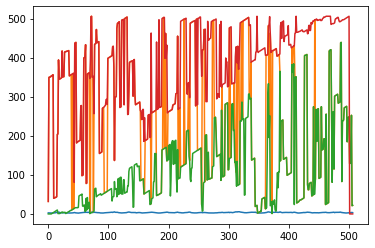

In [ ]:
# plt.imshow(mp)
for i in range(mp.shape[1]):
    plt.plot(mp[:,i])


日本語


(a:ArrayLike、axis: int | None = ...、kind:_SortKind | None = ..., order: str | Sequence[str] | None = ...).-> ndarray
配列をソートするためのインデックスを返す。

与えられた軸に沿って、kindキーワードで指定されたアルゴリズムで間接的なソートを行う。
キーワードで指定されたアルゴリズムで間接的にソートを行う。と同じ形状のインデックスの配列を返す。
aと同じ形のインデックスの配列を返す。

パラメータ

a : array_like
ソートする配列。
axis : int または None, オプション
ソートする軸を指定します。 デフォルトは -1 (最後の軸)。None の場合
の場合、平坦化された配列が使用されます。
kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, オプション。
並べ替えのアルゴリズム。デフォルトは 'quicksort' です。デフォルトは 'quicksort' です。
と 'mergesort' はどちらも timsort を使用していることに注意しましょう。
実際の実装は、データ型によって異なります。mergesort' オプション
オプションは後方互換性のために残されています。

order : strまたはstrのリスト、オプション
aがフィールドを持つ配列の場合、この引数は、どのフィールドを最初に、2番目に比較するかを指定します。
この引数は、どのフィールドを最初に比較するか、2番目に比較するか、などを指定します。 1つのフィールドを文字列で指定することができ
を文字列で指定することができ、すべてのフィールドを指定する必要はありません。
しかし，指定されなかったフィールドは，dtypeで指定された順に使用される。
ただし，指定されていないフィールドは，同値を解消するために，dtypeの中で出てくる順に使用される。

戻り値

index_array : ndarray, int
指定された軸に沿って a をソートするインデックスの配列。
aが1次元の場合、a[index_array]はソートされたaを返す。
より一般的には、 np.take_along_axis(a, index_array, axis=axis)
は次元に関係なく常にソートされた a を生成します。

参照

sort : 使用されるソートアルゴリズムの説明．
lexsort : 複数のキーを持つ間接的な安定ソート。
ndarray.sort : インプレイスソート。
argpartition : 間接的な部分ソート。
take_along_axis :argsortのindex_arrayを、あたかもsortのように配列に適用する。
を、あたかも sort を呼んだかのように配列に適用する。

注意事項

様々なソートアルゴリズムに関する注意点は sort を参照してください。

NumPy 1.4.0では、argsortは実数/複素数の配列で動作し、その中には
nan 値を含む実数/複素数の配列で動作します。強化されたソート順は sort に記述されています。

例

1次元の配列。

>>> x = np.array([3, 1, 2])
>>> np.argsort(x)
array([1, 2, 0])
2次元の配列

>>> 2次元配列： >> x = np.array([[0, 3], [2, 2]])
>>> x
array([[0, 3],
[2, 2]])
>> ind = np.argsort(x, axis=0) # 第1軸に沿ってソート（下方向）。
>>> ind
array([[0, 1],
[1, 0]])
>> np.take_along_axis(x, ind, axis=0) # np.sort(x, axis=0)と同じ。
array([[0, 2],
[2, 3]])
>> ind = np.argsort(x, axis=1) # 最後の軸に沿ってソート（across)
>>> ind
array([[0, 1],
[0, 1]])
>> np.take_along_axis(x, ind, axis=1) # np.sort(x, axis=1)と同じ。
array([[0, 3],
[2, 2]])
N次元配列のソート済み要素の添え字。

>> ind = np.unravel_index(np.argsort(x, axis=None), x.shape)
>>> ind
(配列([0, 1, 1, 0]), 配列([0, 0, 1, 1]))
>>> x[ind] # np.sort(x, axis=None) と同じです。
array([0, 2, 2, 3])
キーでソートする

>> x = np.array([(1, 0), (0, 1)], dtype=[('x', '<i4'), ('y', '<i4')])
>>> x
array([(1, 0), (0, 1)],
dtype=[('x', '<i4'), ('y', '<i4')])
>>> np.argsort(x, order=('x','y'))
array([1, 0])
>>> np.argsort(x、order=('y','x')))の場合
array([0, 1])

DeepL.comで別の訳し方を確認する



上


In [ ]:
mp[:, 0]

array([1.6838049, 1.5552207, 1.3331249, 1.1616956, 1.1165605, 1.2757457,
       1.2328876, 1.4084836, 1.4248332, 1.5261371, 1.6234547, 1.7215563,
       1.9150101, 2.30295  , 2.9286215, 3.0545464, 3.5024726, 3.5546863,
       3.3922582, 2.681815 , 2.1484473, 1.770987 , 1.8303356, 2.0042565,
       1.975953 , 1.8654425, 1.9569658, 1.7279803, 1.4929454, 1.3319465,
       1.2509565, 1.326316 , 1.3372759, 1.4469422, 1.4661604, 1.2611583,
       1.3937516, 1.3415294, 1.3977455, 1.5261371, 1.5985953, 1.7215563,
       2.065172 , 2.6439474, 2.578061 , 1.8077884, 1.6785302, 1.6464504,
       1.3434985, 1.3067397, 1.114623 , 1.3873935, 1.6018631, 1.6851119,
       1.9478722, 2.064301 , 2.264854 , 2.4502046, 2.7170181, 2.8048768,
       2.9831393, 3.077973 , 3.1679087, 3.1391819, 3.1715524, 2.9152339,
       2.8507738, 3.03884  , 3.2483408, 3.5617027, 3.6552944, 3.5776403,
       3.0244534, 2.771619 , 2.6229491, 2.9090166, 3.2290242, 3.056872 ,
       2.8946927, 2.6125574, 2.5459867, 2.183    , 

In [ ]:
np.argsort( mp[:, 0])

array([185,  50,   4, 351, 350,   3, 352, 353,   6, 416,  30,  35,  91,
       271,   5, 184,  49, 354,  31,  29, 415,   2, 274, 495, 417,  32,
       349, 355,  37,  48, 183, 270,  90,  51, 186,  36, 182, 356,  38,
       158,  89,   7, 496, 275, 494, 273, 156,  87,   8, 269,  33, 160,
       122, 159,  34, 418, 120, 268, 272,  88, 157,  28, 244, 493, 497,
       267,   9,  39, 243, 155,  86, 121,   1, 123, 419, 414,  92, 245,
       276, 358,  40,  52, 187, 357, 124, 492, 246, 498,  10, 242, 247,
       499,  47, 181, 222, 266, 223, 439,  46, 277,   0,  93,  53, 188,
       348, 162, 224, 449, 161,  41,  11, 146, 280,  27, 420, 241, 265,
       359,  21, 347, 225, 125, 240, 189, 163, 438,  45, 119, 491, 278,
        22,  25, 279, 208, 451, 126, 221, 450, 445, 440,  94, 180,  12,
       209, 248, 207, 447, 329, 421, 422,  54,  26, 281, 147, 239, 441,
       154,  85,  24, 444, 500, 327, 452,  23, 127, 360, 264, 448, 465,
       210, 443, 118, 128, 501, 413, 446, 148, 282,  95,  55,  4

In [ ]:
#https://note.nkmk.me/python-numpy-sort-argsort/
motif_idx = np.argsort( mp[:, 0])[0]#NumPyのsortとargsort関数で任意の行・列を基準にソート
motif_idx

185

In [ ]:
mp[:, 1]

array([ 31., 349., 350., 350., 351., 353., 353., 355., 356.,  39.,  40.,
        41.,  41.,  42.,  43., 203., 204., 394., 345., 345., 346., 347.,
       348., 417., 350., 351., 351., 414., 415., 415., 416., 416., 417.,
       417., 418., 353., 354., 355., 356.,   9., 358.,  11.,  12.,  13.,
       437., 438., 439., 181., 183., 184., 185., 186., 187., 188., 276.,
       277.,  97.,  98.,  99., 399., 400., 401., 433.,  77.,  78., 358.,
       359., 360., 361.,   0.,   1., 505., 506., 350., 351.,   5., 256.,
       434., 435., 436., 472., 438., 439., 440., 441., 154., 155., 156.,
       157., 158., 270., 271., 272.,  52.,  53.,  54.,  55.,  56.,  57.,
       398., 399., 400., 401., 402., 403., 404., 405., 428., 429., 377.,
       136., 298., 299., 300., 475., 488., 489., 490., 492., 272., 273.,
       274., 496., 496., 497., 498., 279., 500., 501., 502., 503., 504.,
       254., 255., 314., 387., 389., 390., 390., 391., 392., 301., 394.,
       395., 304., 279., 280., 281., 282., 283., 28

In [ ]:
print("motif_idx =",motif_idx,f"    mpの{motif_idx}行、2列目",mp[motif_idx, 1])

motif_idx = 185     mpの185行、2列目 50.0


In [ ]:

nearest_neighbor_idx = mp[motif_idx, 1]
#最近接はインデックス50.0に位置します。
print(f"最近接はインデックス {nearest_neighbor_idx}に位置します。")

最近接はインデックス 50.0に位置します。


Steam Flow

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12514 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12497 missing from current font.
  font.set_

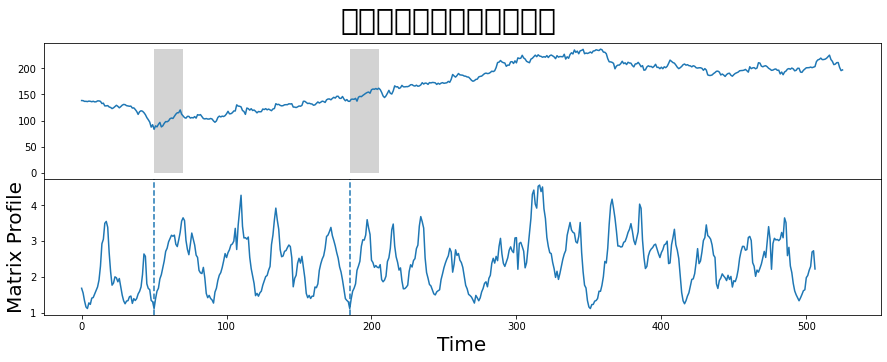

In [ ]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = (15,5))
plt.suptitle('モチーフ（パターン）発見', fontsize='30', fontname = 'MS Mincho')

axs[0].plot(x['Open'].values)
axs[0].set_ylabel('スチームフロー', fontsize='20')
height = x['Open'].max()
rect = Rectangle((motif_idx, 0), m, height, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, height, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()



185 50.0


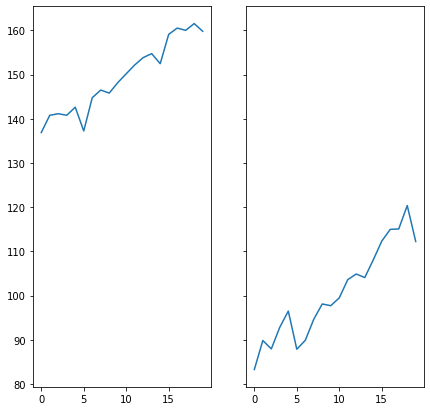

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (7,7), sharey=True)

values = x['Open'].to_numpy()
print(motif_idx,nearest_neighbor_idx )
nearest_neighbor_idx = nearest_neighbor_idx.astype(np.int32)
y1 = values[motif_idx:motif_idx+m]
y2 = values[nearest_neighbor_idx:nearest_neighbor_idx+m]
ax[0].plot(y1)
ax[1].plot(y2)

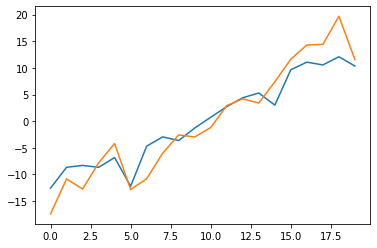

In [ ]:
y1_norm = y1 - y1.mean()#y１正規化
y2_norm = y2 - y2.mean()#y2正規化

plt.plot(y1_norm, label = 'y1')
plt.plot(y2_norm, label = 'y2')

# 結論　つまり行列プロファイルを行うことで時系列内で変化している変化点発見に役立つ

In [ ]:
!pip install wwo_hist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wwo_hist import retrieve_hist_data
import os

In [ ]:
def get_api_key():
    with open("apikey.txt", 'r') as f:
        return f.readline().strip('\n')

In [ ]:
api_key = get_api_key()

FileNotFoundError: ignored

In [ ]:
freq = 24 # once a day
start_date = "1-1-2018"
end_date = "2-2-2022"
location_list = ["albuquerque"]
hist_weather_data = retrieve_hist_data(api_key=api_key, 
                                      location_list=location_list, 
                                      start_date=start_date, 
                                      end_date=end_date, 
                                      frequency=freq, 
                                      location_label=False, 
                                      export_csv=True, 
                                      store_df=True)



Retrieving weather data for albuquerque


Currently retrieving data for albuquerque: from 2018-01-01 to 2018-01-31
Time elapsed (hh:mm:ss.ms) 0:00:01.131687
Currently retrieving data for albuquerque: from 2018-02-01 to 2018-02-28
Time elapsed (hh:mm:ss.ms) 0:00:02.034009
Currently retrieving data for albuquerque: from 2018-03-01 to 2018-03-31
Time elapsed (hh:mm:ss.ms) 0:00:02.958570
Currently retrieving data for albuquerque: from 2018-04-01 to 2018-04-30
Time elapsed (hh:mm:ss.ms) 0:00:03.855208
Currently retrieving data for albuquerque: from 2018-05-01 to 2018-05-31
Time elapsed (hh:mm:ss.ms) 0:00:04.932705
Currently retrieving data for albuquerque: from 2018-06-01 to 2018-06-30
Time elapsed (hh:mm:ss.ms) 0:00:05.989033
Currently retrieving data for albuquerque: from 2018-07-01 to 2018-07-31
Time elapsed (hh:mm:ss.ms) 0:00:06.908310
Currently retrieving data for albuquerque: from 2018-08-01 to 2018-08-31
Time elapsed (hh:mm:ss.ms) 0:00:07.796645
Currently retrieving data for albuqu

In [ ]:
abq = pd.read_csv("albuquerque.csv")

In [ ]:
abq.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2018-01-01,9,-3,0.0,8.7,2,94,05:05 PM,06:35 AM,07:15 AM,...,15,20,36,0.0,1024,9,10,149,8,albuquerque
1,2018-01-02,11,1,0.0,8.7,3,100,06:11 PM,07:38 AM,07:15 AM,...,15,1,35,0.0,1023,11,10,298,10,albuquerque
2,2018-01-03,10,-1,0.0,8.7,2,92,07:20 PM,08:35 AM,07:15 AM,...,10,36,32,0.0,1025,10,10,203,6,albuquerque
3,2018-01-04,11,0,0.0,8.7,3,85,08:28 PM,09:25 AM,07:15 AM,...,7,6,22,0.0,1021,11,10,224,3,albuquerque
4,2018-01-05,11,1,0.0,7.0,2,78,09:36 PM,10:08 AM,07:16 AM,...,8,19,26,0.0,1023,11,10,292,4,albuquerque


In [ ]:
abq.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location'],
      dtype='object')

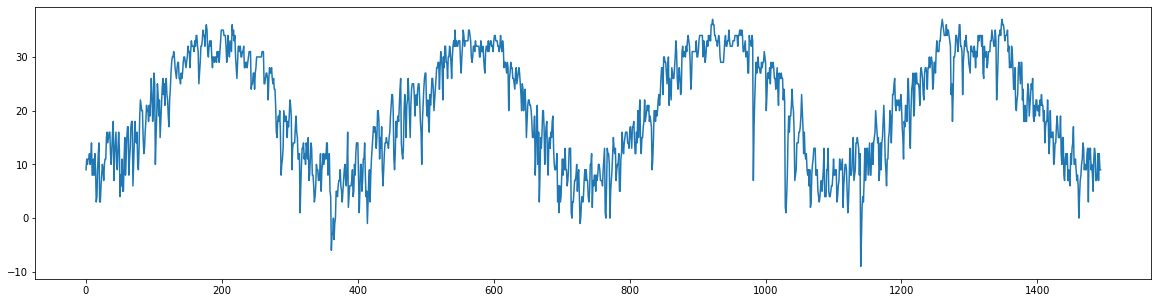

In [ ]:
plt.figure(figsize = (20,5))
values = abq['maxtempC'].values.astype(np.float)
plt.plot(values)

In [ ]:
m = 60
mp = stumpy.stump(values, m)

In [ ]:
motif_idx = np.argsort(mp[:, 0])[0]
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 1389


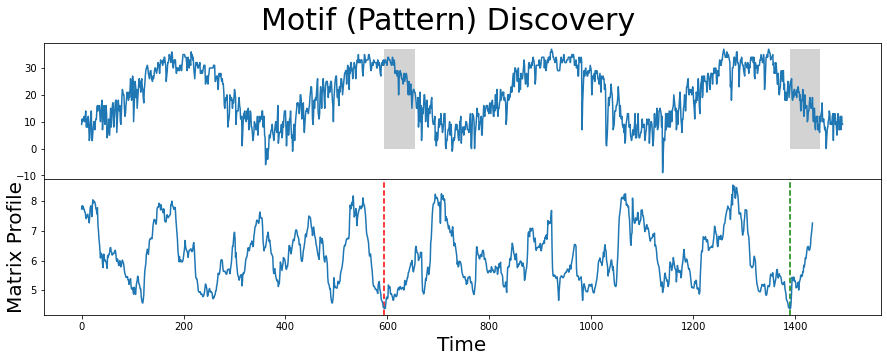

In [ ]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = (15,5))
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(values)
# axs[0].set_ylabel('Steam Flow', fontsize='20')
height = values.max()
rect = Rectangle((motif_idx, 0), m, height, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, height, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed", color = 'red')
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed", color = 'green')
axs[1].plot(mp[:, 0])
plt.show()



594 1389


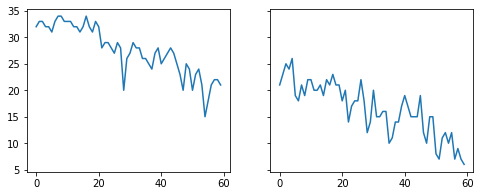

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (8,3), sharey=True)

# values = values
print(motif_idx,nearest_neighbor_idx )
nearest_neighbor_idx = nearest_neighbor_idx # .astype(np.int32)
y1 = values[motif_idx:motif_idx+m]
y2 = values[nearest_neighbor_idx:nearest_neighbor_idx+m]
ax[0].plot(y1)
ax[1].plot(y2)

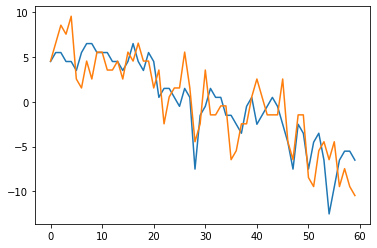

In [ ]:
y1_norm = y1 - y1.mean()
y2_norm = y2 - y2.mean()

plt.plot(y1_norm, label = 'y1')
plt.plot(y2_norm, label = 'y2')